# Sentinel 2 land cover

<b>Table of Contents</b>

- Overview
- Setup
    - Get authentication token
- Data layers
- Querying the data layer
    - Point query
    - Raster query
- References
  
## Overview

The data set contains information about a global map of land use/land cover (LULC), derived from ESA Sentinel-2 imagery at 10m resolution, and was produced by Impact Observatory using a deep learning AI land classification model.

There are 9 LULC classes generated, including Water, Trees, Flooded Vegetation, Crops, Build Area, Bare Ground, Snow/Ice, Clouds and Rangeland.

<table >
    <h3>Class definitions</h3>
    <tr>
        <th align="left"> Value </th>
        <th align="left"> Name </th>
        <th align="left"> Description </th>
    </tr>
    <tr>
        <td align="left"> 1 </td>
        <td align="left"> Water </td>
        <td align="left"> Areas where water was predominantly present throughout the year. It has little to no sparse vegetation nor built up features. <br/><br/><b>Examples:</b> rivers, ponds, lakes, oceans.</td>
    </tr>
    <tr>
        <td align="left"> 2 </td>
        <td align="left"> Trees </td>
        <td align="left"> Any significant clustering of tall (~15 feet or higher) dense vegetation, typically with a closed or dense canopy.<br/><br/><b>Examples: </b>wooded vegetation,  clusters of dense tall vegetation within savannas, plantations, swamp or mangroves (dense/tall vegetation with ephemeral water or canopy too thick to detect water underneath).</td>
    </tr>
    <tr>
        <td align="left"> 4 </td>
        <td align="left"> Flooded Vegetation </td>
        <td align="left"> Areas of any type of vegetation with obvious intermixing of water throughout a majority of the year,  seasonally flooded area that is a mix of grass/shrub/trees/bare ground. <br/><br/><b>Examples: </b>flooded mangroves, rice paddies and other heavily irrigated and inundated agriculture.</td>
    </tr>
    <tr>
        <td align="left"> 5 </td>
        <td align="left"> Crops </td>
        <td align="left"> Human planted/plotted cereals, grasses, and crops that not at tree height levels. <br/><br/><b>Examples: </b>corn, wheat, soy, rice etc.</td>
    </tr>
    <tr>
        <td align="left"> 7 </td>
        <td align="left"> Build Area </td>
        <td align="left"> Human made structures - major road and rail networks, parking structures, office buildings and residential housing. <br/><br/><b>Examples: </b>houses, dense villages / towns / cities, paved roads, asphalt.</td>
    </tr>
    <tr>
        <td align="left"> 8 </td>
        <td align="left"> Bare Ground </td>
        <td align="left"> Areas of rock or soil with very sparse to no vegetation for the entire year, large areas of sand and deserts with no to little vegetation. <br/><br/><b>Examples: </b>exposed rock or soil, desert and sand dunes, dried lake beds, mines.</td>
    </tr>
    <tr>
        <td align="left"> 9 </td>
        <td align="left"> Snow/Ice </td>
        <td align="left"> Large homogenous areas of permanent snow or ice, typically only in mountain areas or highest latitudes. <br/><br/><b>Examples: </b>glaciers, permanent snowpack, snow fields.</td>
    </tr>
    <tr>
        <td align="left"> 10 </td>
        <td align="left"> Clouds </td>
        <td align="left"> No land cover information due to persistent cloud cover.</td>
    </tr>
    <tr>
        <td align="left"> 11 </td>
        <td align="left"> Rangeland </td>
        <td align="left"> Open areas covered in homogenous grasses with little to no taller vegetation; wild cereals and grasses <br/><br/><b>Examples: </b>natural meadows and moderate to sparse cover of bushes, shrubs and tufts of grass, savannas with very sparse grasses, trees or other plants.</td>
    </tr>
</table>

Let us get a practical understanding about this dataset and its usage through this tutorial.

## Setup

Before starting, you have to install IBM EI Geospatial python SDK i.e ibmpairs and other modules needed to run this sample, mentioned in the cell below.

<b>Note:</b> To run this notebook seamlessly, you have to first configure your Geospatial APIs' credentials in a file named `secrets.ini` in the below format:

```
[EI]
api.api_key = <Your Geospatial APIs API key>
api.tenant_id = <Your Geospatial APIs Tenant ID>
api.org_id = <Your Geospatial APIs Org ID>
```

Keep the secrets.ini file at an appropriate relative location of this notebook. For example, as specified in the config below.

```config.read('../../../../auth/secrets.ini')```

In [ ]:
%pip install ibmpairs
%pip install configparser
%pip install matplotlib

In [2]:
import ibmpairs.client as client
import ibmpairs.catalog as catalog
import ibmpairs.query as query
import pandas as pd
import configparser
import json
import numpy as np
import PIL
from IPython.display import Image, display
import matplotlib.pyplot as plt
import os

Now, we shall create a client object using the API_KEY, TENANT_ID (or CLIENT_ID) and ORG_ID to create an authenticated HTTP client Authentication token using 'ibmpairs.client' module, to use it in the subsequent steps.

### Get Authentication token

In [4]:
config = configparser.RawConfigParser()
config.read('../../../../auth/secrets.ini')
# Best practice is not to include secrets in source code so we read
# an api key, tenant id and org id from a secrets.ini file.
# You could set the credentials in-line here but we don't
# recommend it for security reasons.

EI_API_KEY    = config.get('EI', 'api.api_key')
EI_TENANT_ID  = config.get('EI', 'api.tenant_id') 
EI_ORG_ID     = config.get('EI', 'api.org_id')  

EI_client_v3  = client.get_client(api_key   = EI_API_KEY,
                                    tenant_id = EI_TENANT_ID,
                                    org_id    = EI_ORG_ID,
                                    legacy    = False,
                                    version   = 3
                                   )

2025-04-02 12:11:27 - paw - INFO - The client authentication method is assumed to be OAuth2.
2025-04-02 12:11:27 - paw - INFO - Legacy Environment is False
2025-04-02 12:11:27 - paw - INFO - The authentication api key type is assumed to be IBM EIS, because the api key prefix 'PHX' is present.
2025-04-02 12:11:29 - paw - INFO - Authentication success.
2025-04-02 12:11:29 - paw - INFO - HOST: https://api.ibm.com/geospatial/run/na/core/v3


## Data layers
We shall start by querying the catalog to retrieve the Data Set ID and the Data Layer that form the dataset.

In [4]:
pd.set_option('display.max_colwidth', None)
search_df=catalog.search("Sentinel 2 land cover")
search_df[['dataset_id','data_layer_id','data_layer_name','data_layer_description_short','data_layer_level','data_layer_type','data_layer_unit','data_set_name','data_set_description_short']]

,dataset_id,data_layer_id,data_layer_name,data_layer_description_short,data_layer_level,data_layer_type,data_layer_unit,data_set_name,data_set_description_short
0,61,61001,sentinel2 land cover annual,Sentinel-2 based 10m land use/land cover annual,23,Raster,,Sentinel 2 land cover,Sentinel-2 based 10m land use/land cover


As seen above, the Data Set of ID 61 has one Data Layer. This Data Layer can be used to visualize land use/land cover anywhere on Earth. This layer can also be used in analysis that require land use/land cover input. 

Each of the Data Layers are identified by a unique Data Layer ID.To gain a better understanding of the Data Set and its geospatial and temporal coverage as well as other relevant metadata, we can make further queries to the ibmpairs catalog submodule as mentioned in the [tutorials](https://ibm.github.io/ibmpairs/tutorials/quickstart/quickstartcatalog.html).

## Querying the data layers


### Point Query
Next, we shall perform a point query for different locations to observe the land use/land cover.


In [5]:
query_result = query.submit(
    {
        "layers" : [
            {
                "type" : "raster", 
                "id" : "61001"
            }
        ],
        "spatial" : {
            "type" : "point",
            "coordinates" : [
                "41.6392", "-87.4548",      # East Chicago, United States
                "41.7075", "-86.895",       # Michigan City, United States
                "39.544125", "-105.569018", # Bailey Colorado, United States
                "40.70159", "-74.20154",    # Weequahic Lake, Newark, New Jersey United States
                "40.65324", "-74.16245",    # Elizabeth New Jersey United States
                "40.74927", "-74.14690",    # Harrison New Jersey United States
                "38.094382", "-119.473812"  # Sierra Nevada Mountains, California
            ] 
        },
        "temporal" : {
            "intervals" : [
                {
				    "snapshot": "2023-01-01T00:00:00Z"
			    }
            ]
        }
    } , client=EI_client_v3)

point_df = query_result.point_data_as_dataframe()
point_df['datetime'] = pd.to_datetime(point_df['timestamp'] , unit='ms', errors = 'coerce')
point_df['datetime'] = point_df['datetime'].dt.strftime('%Y-%m-%dT%H:%M:%SZ')
point_df = point_df.drop(columns=['timestamp'])
point_df

2025-04-02 12:11:34 - paw - INFO - TASK: submit STARTING.
2025-04-02 12:11:37 - paw - INFO - TASK: submit COMPLETED.


,layer_id,layer_name,dataset,longitude,latitude,value,datetime
0,61001,sentinel2 land cover annual,Sentinel 2 land cover,-119.473812,38.094382,11.0,2023-01-01T00:00:00Z
1,61001,sentinel2 land cover annual,Sentinel 2 land cover,-105.569018,39.544125,2.0,2023-01-01T00:00:00Z
2,61001,sentinel2 land cover annual,Sentinel 2 land cover,-74.162450,40.653240,1.0,2023-01-01T00:00:00Z
3,61001,sentinel2 land cover annual,Sentinel 2 land cover,-74.201540,40.701590,1.0,2023-01-01T00:00:00Z
4,61001,sentinel2 land cover annual,Sentinel 2 land cover,-74.146900,40.749270,7.0,2023-01-01T00:00:00Z
5,61001,sentinel2 land cover annual,Sentinel 2 land cover,-87.454800,41.639200,7.0,2023-01-01T00:00:00Z
6,61001,sentinel2 land cover annual,Sentinel 2 land cover,-86.895000,41.707500,7.0,2023-01-01T00:00:00Z


We see above, the land use/land cover for given coordinates. For instance, the location at coordinates (40.74927, -74.14690) in Harrison, New Jersey, USA has value 7 and it indicates the Build Area such as houses, dense villages / towns / cities etc. The location at coordinates (39.544125, -105.569018) in Bailey Colorado, United States, has value 2 and it indicates clustering of tall (~15 feet or higher) dense vegetation in this region.

Note: The comments within the query JSON, intended for descriptive purposes, may cause compatibility issues in other programming languages and should be removed when using the data in those contexts.

### Raster Query
Next, we shall make a raster query for a square area Hammond, Indiana, United States (41.63529, -87.50748) and observe it's land use/land cover and try to check the value of labeled image pixels.

In [6]:
lulc_Result = query.submit_check_status_and_download(
    {
        "publish": True,
        "name": "Sentinel2 LULC data of Hammond, Indiana, United States",
        "spatial": {
            "type": "square",
            "coordinates": [
                41.63529, -87.50748, 
                41.65134, -87.49718
            ]
        },
        "temporal": {
            "intervals": [
              {
                  "snapshot": "2023-01-01T00:00:00Z"
              }
            ]
        },
        "layers": [
            {
                "alias" : "lulc",
                "type" : "raster", 
                "id" : "61001"
            }
        ]
    }, client=EI_client_v3)

2025-04-02 12:11:41 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-04-02 12:11:43 - paw - INFO - The query was successfully submitted with the id: 1743552000_24103286.
2025-04-02 12:11:44 - paw - INFO - The query 1743552000_24103286 has the status Queued.
2025-04-02 12:12:16 - paw - INFO - The query 1743552000_24103286 has the status Succeeded.
2025-04-02 12:12:16 - paw - INFO - The query 1743552000_24103286 was successful after checking the status.
2025-04-02 12:12:47 - paw - INFO - The query 1743552000_24103286 has the status Succeeded.
2025-04-02 12:12:47 - paw - INFO - The query 1743552000_24103286 was successful after checking the status.
2025-04-02 12:12:47 - paw - WARNING - The query download folder download was not present on the operating system as either a fixed or relative path. Attempting to create.
2025-04-02 12:12:47 - paw - INFO - The query download folder is set to the path /Users/environmental-intelligence/Environmental-Intelligence/geospatial/sam

The query takes a few seconds to complete and downloads the output as a zip file in the /download folder within the same location as this notebook. Now let us display the resultant tiffs using the following utility function.

### Utility functions to display the tiff files

Let's define a function to help us get the bounding box co-ordinates everytime we want to visualize a result, and then display the raster images we get as a result of the execution of the above query.

In [7]:
def get_extent(file):
    with open(file, 'r') as summary_file:
        stats = json.load(summary_file)
    boundingBox=stats["boundingBox"]
    myextent = [boundingBox["minLongitude"],boundingBox["maxLongitude"],boundingBox["minLatitude"],boundingBox["maxLatitude" ] ]
    return myextent

output_image_array = []

def display_LULC_rasters_from_download(rasterfiles_list, suffix):
    for file in rasterfiles_list :
        if  file.endswith('.tiff'):
            json_file= file+'.json'
            arrayLULC = np.array(PIL.Image.open(file))
            plt.figure(figsize = (20, 9), dpi=80) # Sets the size and resolution of the plot
            mask = (arrayLULC == -9999)
            # Masked array to exclude NO Data points from plotting
            masked_array = np.ma.masked_array(arrayLULC, mask)
            plt.imshow(masked_array,cmap = 'viridis', vmin=0, vmax=11, extent = get_extent(json_file)) # Loads the raster data and sets the colormap
            plt.colorbar() # Adds the color bar
            plt.title(" "+os.path.basename(file))
            output_image_path = os.path.splitext(os.path.basename(file))[0] + "-" + suffix +".png"
            output_image_array.append(output_image_path)
            # Save the figure
            plt.savefig(output_image_path, bbox_inches='tight')
    plt.show( ) # Displays the image

### Display the tiff files

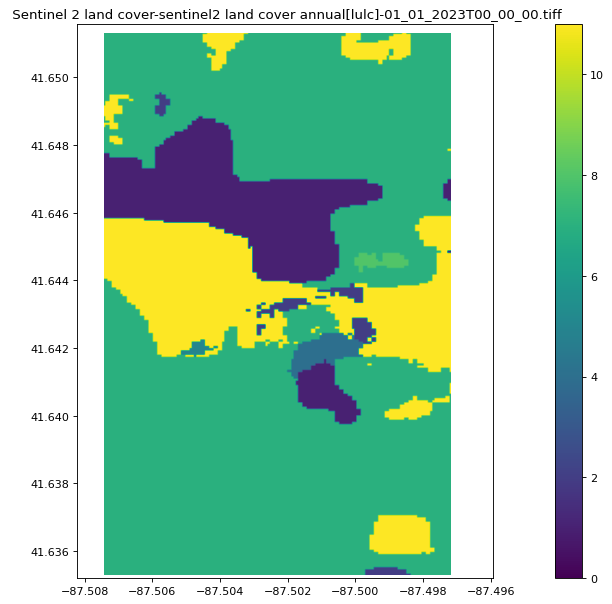

In [8]:
# display tiff files
result_rasterfiles_list = lulc_Result.list_files()
result_rasterfiles_list.sort()
display_LULC_rasters_from_download(result_rasterfiles_list, "")

This image represents the land cover/land use of Hammond, Indiana, United States. The color gradient provides a visual representation of the value classes with respect to land cover/land use around this region.

Let's modify this query and add query filter to only fetch the nearby area which is either Water(value=1) or Build Area(value=7). 

To apply a filter in this query, we must aggregate multiple values across different timestamps in the datalayer using the Max aggregation.

The filter is defined via `"filter": {"expression" : "EQ 1"}`, is restricting the land cover/land use data for Water covered areas.

In [9]:
lulc_waterarea_Result = query.submit_check_status_and_download(
    {
        "publish": True,
        "name": "Sentinel2 LULC data of Hammond, Indiana, United States(Water Area)",
        "spatial": {
            "type": "square",
            "coordinates": [
                41.63529, -87.50748, 
                41.65134, -87.49718
            ]
        },
        "temporal": {
            "intervals": [
              {
                  "snapshot": "2023-01-01T00:00:00Z"
              }
            ]
        },
        "layers": [
            {
                "alias" : "waterarea",
                "type" : "raster", 
                "id" : "61001",
                "temporal": {"intervals": [{"snapshot": "2023-01-01T00:00:00Z"}]},
                "aggregation" : "Max",
                "filter": {"expression" : "EQ 1"}            
            }
        ]
    }, client=EI_client_v3)

2025-04-02 12:14:19 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-04-02 12:14:21 - paw - INFO - The query was successfully submitted with the id: 1743552000_24261423.
2025-04-02 12:14:22 - paw - INFO - The query 1743552000_24261423 has the status Queued.
2025-04-02 12:14:54 - paw - INFO - The query 1743552000_24261423 has the status Succeeded.
2025-04-02 12:14:54 - paw - INFO - The query 1743552000_24261423 was successful after checking the status.
2025-04-02 12:15:25 - paw - INFO - The query 1743552000_24261423 has the status Succeeded.
2025-04-02 12:15:25 - paw - INFO - The query 1743552000_24261423 was successful after checking the status.
2025-04-02 12:15:25 - paw - INFO - The query download folder is set to the path /Users/environmental-intelligence/Environmental-Intelligence/geospatial/samples/v3/datasets/sentinel2_landcover/download/.
2025-04-02 12:15:28 - paw - INFO - The query 1743552000_24261423 is a zip.
2025-04-02 12:15:28 - paw - INFO - The query fil

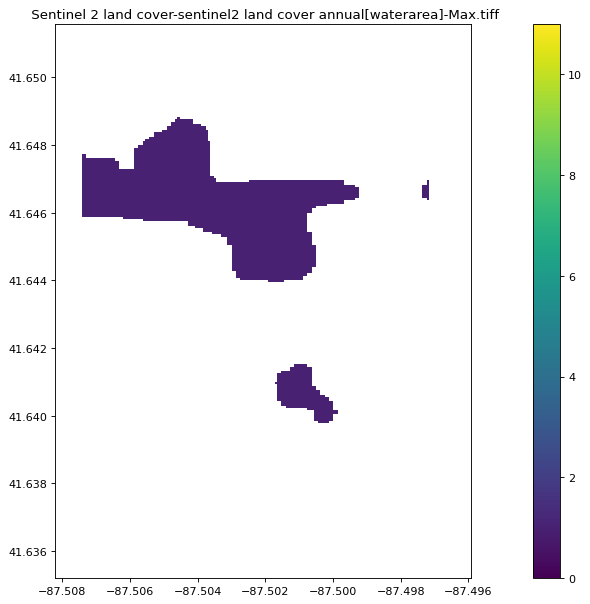

In [10]:
# display tiff files
result_rasterfiles_list = lulc_waterarea_Result.list_files()
result_rasterfiles_list.sort()
display_LULC_rasters_from_download(result_rasterfiles_list, "waterarea")

Let's modify this query and add query filter to only fetch the nearby area which is Build Area(value=7).

The filter is defined via `"filter": {"expression" : "EQ 7"}`, restricting the land cover/land use data for Build Area.

In [11]:
lulc_buildarea_Result = query.submit_check_status_and_download(
    {
        "publish": True,
        "name": "Sentinel2 LULC data of Hammond, Indiana, United States(Build Area)",
        "spatial": {
            "type": "square",
            "coordinates": [
                41.63529, -87.50748, 
                41.65134, -87.49718
            ]
        },
        "temporal": {
            "intervals": [
              {
                  "snapshot": "2023-01-01T00:00:00Z"
              }
            ]
        },
        "layers": [
            {
                "alias" : "buildarea",
                "type" : "raster", 
                "id" : "61001",
                "temporal": {"intervals": [{"snapshot": "2023-01-01T00:00:00Z"}]},
                "aggregation": "Max",
                "filter": {"expression" : "EQ 7"} 
            }
        ]
    }, client=EI_client_v3)

2025-04-02 12:23:47 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-04-02 12:23:49 - paw - INFO - The query was successfully submitted with the id: 1743552000_24829737.
2025-04-02 12:23:51 - paw - INFO - The query 1743552000_24829737 has the status Queued.
2025-04-02 12:24:22 - paw - INFO - The query 1743552000_24829737 has the status Succeeded.
2025-04-02 12:24:22 - paw - INFO - The query 1743552000_24829737 was successful after checking the status.
2025-04-02 12:24:54 - paw - INFO - The query 1743552000_24829737 has the status Succeeded.
2025-04-02 12:24:54 - paw - INFO - The query 1743552000_24829737 was successful after checking the status.
2025-04-02 12:24:54 - paw - INFO - The query download folder is set to the path /Users/environmental-intelligence/Environmental-Intelligence/geospatial/samples/v3/datasets/sentinel2_landcover/download/.
2025-04-02 12:24:56 - paw - INFO - The query 1743552000_24829737 is a zip.
2025-04-02 12:24:56 - paw - INFO - The query fil

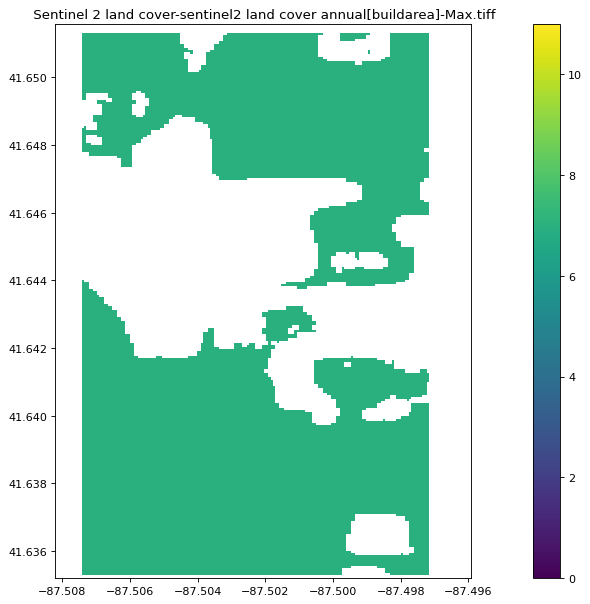

In [14]:
# display tiff files
result_rasterfiles_list = lulc_buildarea_Result.list_files()
result_rasterfiles_list.sort()
display_LULC_rasters_from_download(result_rasterfiles_list, "buildarea")

Let's modify this raster query as below to find the Water (value=1) and Build Area(value=7) in same query. We've used the UDF expression as seen in the query to find Water and Build area. 

User defined functions, short UDFs, allow to perform complex mathematical calculations involving data layers. The user defined function is defined as the value of the `expression` key. 

Aliases specify a temporary name given to the particular layer's data that can be used later using the UDF expression. 

In our query we have used expression such as `($lulc == 1 ? 1 : -9999)`, wherein `lulc` is an alias to fetch land use/land cover areas for specified co-ordinates with max aggregation over given time interval. 
This expression will output/display only areas covered with water such as rivers, oceans, lakes etc and rest of the areas is assigned `-9999` to indicate that the value for those pixels should not be used in analysis. It is often referred to as `nodata` value where data is unavailable or missing or removed from display. 

Subsequently we are defining other aliases named `waterarea`, and `buildarea` which are UDF expressions that use the previously defined alias `lulc`, each of which we'll get to see outputs for (output = "True"). 

Submitting the query using `query.submit_check_status_and_download()` runs the query asynchronously, checks it's status as it runs and, once complete, downloads the results of the query as a zip file named after the query Id.

Let's go ahead, define and submit the raster query and analyze the result.

In [15]:
lulc_udf_Result = query.submit_check_status_and_download(
    {
        "publish": True,
        "name": "Sentinel2 LULC Filtered Data for WaterArea and BuildArea",
        "spatial": {
            "type": "square",
            "coordinates": [
                41.63529, -87.50748, 
                41.65134, -87.49718
            ]
        },
        "temporal": {
            "intervals": [
              {
                  "snapshot": "2023-01-01T00:00:00Z"
              }
            ]
        },
        "layers": [
            {
                "alias": "lulc",
                "id": "61001",
                "type": "raster",
                "aggregation": "Max"
            },
            {
                "alias": "waterarea",
                "expression": "($lulc == 1 ? 1 : -9999)",
                "output": "True"
            },
            {
                "alias": "buildarea",
                "expression": "($lulc == 7 ? 7 : -9999)",
                "output": "True"
            }
        ]
    }, client=EI_client_v3)

2025-04-02 12:28:27 - paw - INFO - The '<class 'str'>' value 'True' was converted to a boolean 'True'.
2025-04-02 12:28:27 - paw - INFO - The '<class 'str'>' value 'True' was converted to a boolean 'True'.
2025-04-02 12:28:27 - paw - INFO - TASK: submit_check_status_and_download STARTING.
2025-04-02 12:28:28 - paw - INFO - The query was successfully submitted with the id: 1743552000_25108731.
2025-04-02 12:28:30 - paw - INFO - The query 1743552000_25108731 has the status Queued.
2025-04-02 12:29:01 - paw - INFO - The query 1743552000_25108731 has the status Succeeded.
2025-04-02 12:29:01 - paw - INFO - The query 1743552000_25108731 was successful after checking the status.
2025-04-02 12:29:34 - paw - INFO - The query 1743552000_25108731 has the status Succeeded.
2025-04-02 12:29:34 - paw - INFO - The query 1743552000_25108731 was successful after checking the status.
2025-04-02 12:29:34 - paw - INFO - The query download folder is set to the path /Users/environmental-intelligence/Enviro

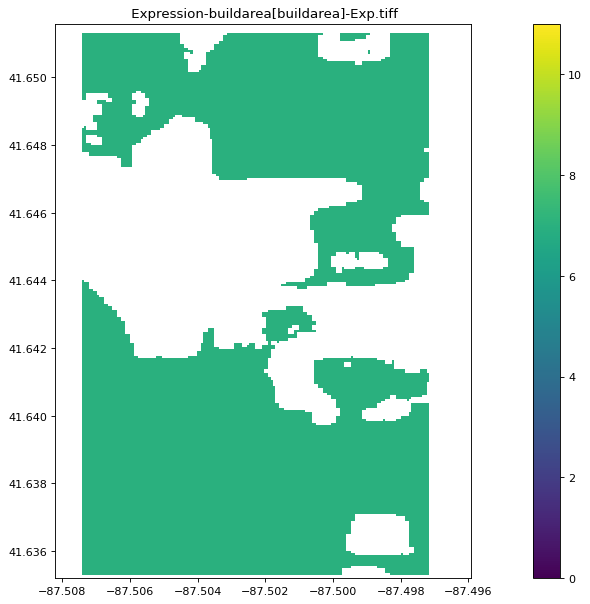

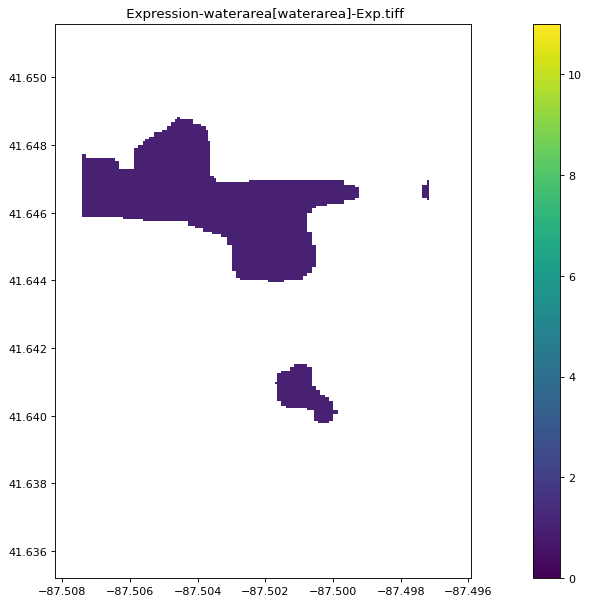

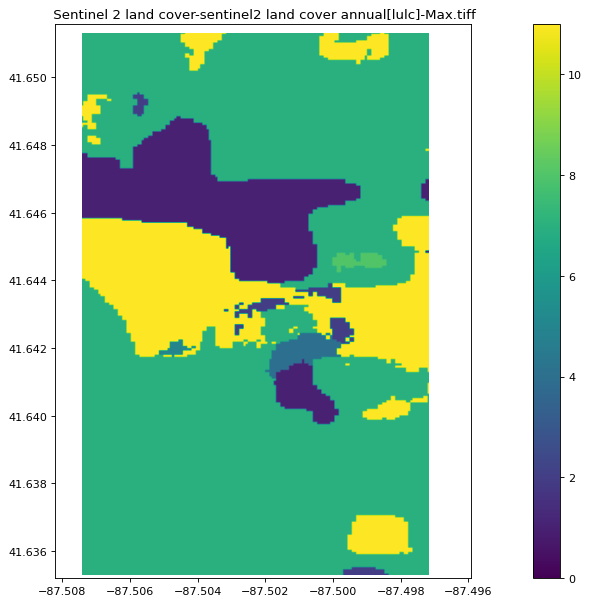

In [16]:
# display tiff files
result_rasterfiles_list = lulc_udf_Result.list_files()
result_rasterfiles_list.sort()
display_LULC_rasters_from_download(result_rasterfiles_list, "")

<b>Output Analysis:</b>
- The first tiff image displays the areas with built-up areas such as road and rail networks, parking structures, office buildings and residential housing. 
- The second tiff image displays the areas with water bounded regions and no sparse vegetation nor built up features.
- The third tiff image displays the land cover/land use of Hammond, Indiana, United States. The color gradient provides a visual representation of the value classes with respect to land cover/land use around this region. 